# Predicting with Neural Networks

In [1]:
from scipy.special import expit
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier

from sklearn import svm
import pandas as pd
import numpy as np
import sklearn

from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import model_selection
# from skearn.model_selection import train_test_split

import seaborn as sns
sns.set_theme(palette='colorblind')


Today, were going to use *very* simple data in order to examin how a neural
network works.

<AxesSubplot:>

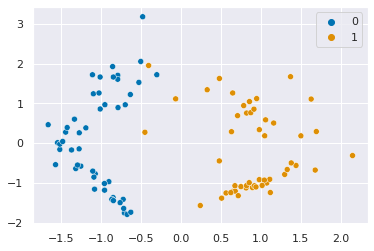

In [2]:
X, y = make_classification(n_samples=100, random_state=1,n_features=2,n_redundant=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, stratify=y,
                          random_state=1)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

First, we'll train and score a tiny neural net: with 1 hidden layer of 1 neuron.
````{margin}
```{tip}
This is actually eqiuvalent to another classifier, called logistic Regression
```

```{admonition} Correction
I've removed the parameter `learning_rate_init=0.1` and `random_state=1`
 because sklearn actually only
uses the learning rate and randomizaiont for some of the optimization algorithms:
 adam and sgd, which we are not using.

These algorithms are good in high dimensional problems, our problem is simple,
so we don't need the advnaced parameters or algorithms.
```
````

In [3]:
clf = MLPClassifier(
  hidden_layer_sizes=(1), # 1 hidden layer, 1 aritficial neuron
  max_iter=100, # maximum 100 interations in optimization
  alpha=1e-4, # regularization
  solver="lbfgs", #optimization algorithm  
  verbose=10, # how much detail to print
  activation= 'identity' # how to transform the hidden layer beofore passing it to the next layer
)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.09933D+00    |proj g|=  4.21069D-01

At iterate    1    f=  5.94993D-01    |proj g|=  2.33065D-01

At iterate    2    f=  2.31377D-01    |proj g|=  1.94550D-01

At iterate    3    f=  7.77706D-02    |proj g|=  4.71313D-02

At iterate    4    f=  6.46813D-02    |proj g|=  2.78380D-02

At iterate    5    f=  5.67453D-02    |proj g|=  1.44718D-02

At iterate    6    f=  5.34348D-02    |proj g|=  1.36082D-02

At iterate    7    f=  5.18003D-02    |proj g|=  1.20832D-02

At iterate    8    f=  4.83562D-02    |proj g|=  2.52769D-03

At iterate    9    f=  4.80518D-02    |proj g|=  1.64091D-03

At iterate   10    f=  4.79184D-02    |proj g|=  1.18365D-03

At iterate   11    f=  4.79070D-02    |proj g|=  4.29842D-04



 This problem is unconstrained.


1.0

At iterate   12    f=  4.79048D-02    |proj g|=  5.25402D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     12     13      1     0     0   5.254D-05   4.790D-02
  F =   4.7904815861860413E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


Now we can see that it actually has another activation, that we didn't change
the output layer still has a logistic activation layer, which we want.  If we
didn't then the output layer wouldn't be able to be interpretted as a probability,
because probability always needs to be between 0 and 1.

In [4]:
clf.out_activation_

'logistic'

The logistic function looks like this:

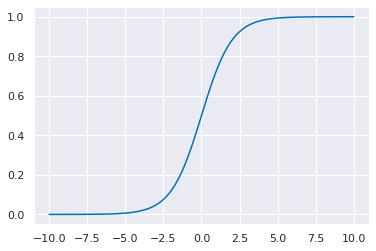

In [5]:
x_logistic = np.linspace(-10,10,100)
y_logistic = expit(x_logistic)
plt.plot(x_logistic,y_logistic)

The fit method learned the following weights:

In [6]:
clf.coefs_

[array([[ 4.4346835 ],
        [-0.12768095]]),
 array([[2.96383812]])]

and biases

In [7]:
clf.intercepts_

[array([1.75515035]), array([0.4937787])]

These are called coefficients and intercepts because the weights are mutliplied
by the inputs and the biases you can interpret as geometrically as shifting things,
like a line intercept (recall y=mx+b)

## Reconstructing the Predict method

we'll use an acutally new point, we can make one up

In [8]:
type([[-1,2]])

list

we want a numpy array so we will cast it

In [9]:
pt = np.array([[-1,2]])

In [10]:
type(pt)

numpy.ndarray

numpy's `matmul` does matrix multiplicaion (multiply columns by rows element wise and sum)

$$f(x) = W_2g(W_1^T x +b_1) + b_2 $$

the $g$ is the activation function, which we set to identity $g(x) = x$ so we don't have to do more

In [11]:
np.matmul(pt,clf.coefs_[0]) + clf.intercepts_[0])*clf.coefs_[1] + clf.intercepts_[1])

SyntaxError: unmatched ')' (81862389.py, line 1)

but we're not quite done, the output layer still transforms using the logistic
function, which is also known as [`expit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html) and we have imported from scipy.

In [12]:
expit((np.matmul(pt,clf.coefs_[0]) + clf.intercepts_[0])*clf.coefs_[1] + clf.intercepts_[1])

array([[0.00027327]])

We can compare this to the classifier's output. It outputs a probability for
each class, we only comptued the probabilyt of the `1` class.

In [13]:
clf.predict_proba(pt)

array([[9.99726730e-01, 2.73270493e-04]])

and we can see how it predicts on that point.

In [14]:
clf.predict(pt)

array([0])

A single artificial neuron like the function below. where it has parameters
that have to be determined before we can use it on an input vector.

In [15]:
def aritificial_neuron_template(activation,weights,bias,inputs):
    '''
    simple artificial neuron

    Parameters
    ----------
    activation : function
        activation function of the neuron
    weights : numpy aray
        wights for summing inputs
    bias: numpy array
        bias term added to the weighted sum
    inputs : numpy array
        input to the neuron

    '''
    return activation(np.matmul(inputs,weights) +bias)

# two common activation functions
identity_activation = lambda x: x
logistic_activation = lambda x: expit(x)

When we instantiate the multilyer perceptron object, `MLPClassifier`, we pick
the activation function and when we give data to the `fit` method, we get
the weights and biases.

A neural network passes the data to the hidden layer, and the output of the
hidden layer to the output layer.  In our neural network, we have just one neuron
at each layer.

So the `predict_proba` method is the same as the following:

In [16]:
aritificial_neuron_template(logistic_activation,clf.coefs_[1],clf.intercepts_[1],
                 aritificial_neuron_template(identity_activation,clf.coefs_[0],
                   clf.intercepts_[0],pt))


array([[0.00027327]])

To make this easier to read, we can make the intermediate neurons their own
lambda functions.

In [17]:
hidden_neuron = lambda x: aritificial_neuron_template(identity_activation,clf.coefs_[0],clf.intercepts_[0],x)
output_neuron = lambda x: aritificial_neuron_template(expit,clf.coefs_[1],clf.intercepts_[1],x)

output_neuron(hidden_neuron(pt))

array([[0.00027327]])

We can confirm that this works the same as the predict probability method:

In [18]:
clf.predict_proba(pt)

array([[9.99726730e-01, 2.73270493e-04]])

## More Features and More Hidden Neurons

First, we'll sample more features and then train a new classifier

In [19]:
X, y = make_classification(n_samples=100, random_state=1,n_features=4,n_redundant=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=5)
pt_4d =np.asarray([[-1,-2,2,-1],[1.5,0,.5,1]])
clf_4d = MLPClassifier(
    hidden_layer_sizes=(1),
    max_iter=5000,
    alpha=1e-4,
    solver="lbfgs",
    verbose=10,
    activation= 'identity'
)

clf_4d.fit(X_train, y_train)


clf_4d.score(X_test, y_test)

NameError: name 'train_test_split' is not defined

We can look at this data

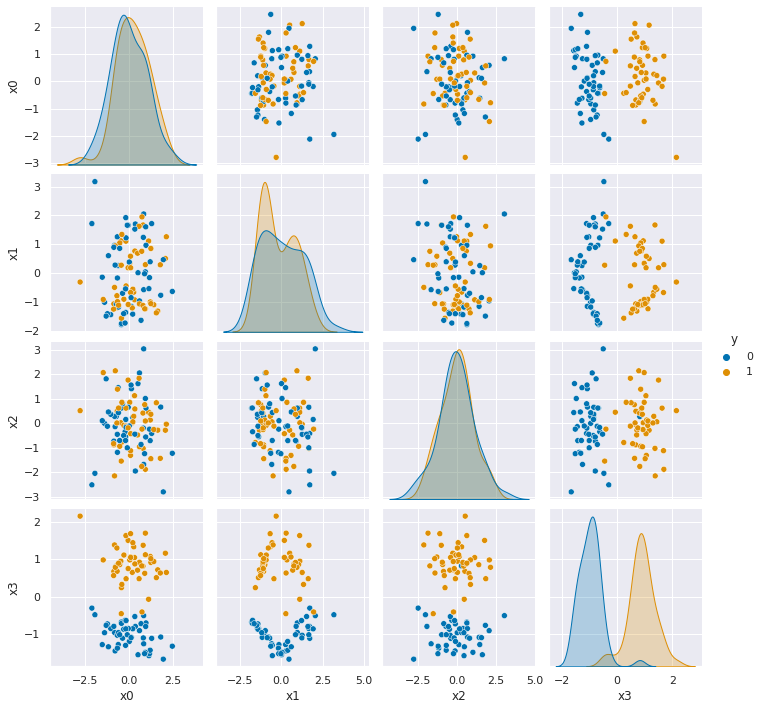

In [20]:
df = pd.DataFrame(X,columns=['x0','x1','x2','x3'])
df['y'] = y
sns.pairplot(df,hue='y')

and based on this, we'll pick a new pair of points to  test on:

In [21]:
pt_4d =np.asarray([[-2,2,2,-2],[1.5,0,-1,3]])

This neural network is just like the one before:

In [22]:
hidden_neuron_4d = lambda x: aritificial_neuron_template(identity_activation,
                                                         clf_4d.coefs_[0],clf_4d.intercepts_[0],x)
output_neuron_4d = lambda x: aritificial_neuron_template(logistic_activation,
                                                         clf_4d.coefs_[1],clf_4d.intercepts_[1],x)


output_neuron_4d(hidden_neuron_4d(pt_4d))

NameError: name 'clf_4d' is not defined

In [23]:
clf_4d.predict_proba(pt_4d)

NameError: name 'clf_4d' is not defined

However, remember this one was not as accurate:

In [24]:
clf_4d.score(X_test, y_test)

NameError: name 'clf_4d' is not defined

To try imporving it, we will add more layers and a different activation function:

In [25]:
clf_4d_4h = MLPClassifier(
    hidden_layer_sizes=(4),
    max_iter=500,
    alpha=1e-4,
    solver="lbfgs",
    verbose=10,
    activation='logistic'
)

clf_4d_4h.fit(X_train, y_train)


clf_4d_4h.score(X_test, y_test)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18499D-01    |proj g|=  9.74112D-02

At iterate    1    f=  6.72406D-01    |proj g|=  6.29961D-02

At iterate    2    f=  3.01475D-01    |proj g|=  9.56919D-02

At iterate    3    f=  1.38170D-01    |proj g|=  4.06613D-02

At iterate    4    f=  6.77357D-02    |proj g|=  9.78179D-03

At iterate    5    f=  6.51807D-02    |proj g|=  1.22121D-02

At iterate    6    f=  6.00664D-02    |proj g|=  1.28390D-02

At iterate    7    f=  5.75132D-02    |proj g|=  3.21291D-03

At iterate    8    f=  5.56862D-02    |proj g|=  5.58919D-03

At iterate    9    f=  5.20499D-02    |proj g|=  1.34643D-02

At iterate   10    f=  4.61949D-02    |proj g|=  7.23477D-03

At iterate   11    f=  4.35800D-02    |proj g|=  6.75115D-03

At iterate   12    f=  4.27648D-02    |proj g|=  4.83810D-03

At iterate   13    f=  4.1

 This problem is unconstrained.


1.0

te   58    f=  2.22662D-02    |proj g|=  1.52310D-03

At iterate   59    f=  2.20527D-02    |proj g|=  1.39027D-03

At iterate   60    f=  2.18159D-02    |proj g|=  1.15635D-03

At iterate   61    f=  2.17452D-02    |proj g|=  9.99020D-04

At iterate   62    f=  2.16545D-02    |proj g|=  4.94297D-04

At iterate   63    f=  2.15798D-02    |proj g|=  1.18304D-04

At iterate   64    f=  2.15660D-02    |proj g|=  1.07849D-04

At iterate   65    f=  2.15462D-02    |proj g|=  1.41216D-04

At iterate   66    f=  2.15397D-02    |proj g|=  1.83221D-04

At iterate   67    f=  2.15312D-02    |proj g|=  1.49328D-04

At iterate   68    f=  2.15176D-02    |proj g|=  1.20358D-04

At iterate   69    f=  2.14852D-02    |proj g|=  2.52188D-04

At iterate   70    f=  2.14530D-02    |proj g|=  2.13058D-04

At iterate   71    f=  2.14324D-02    |proj g|=  3.17254D-04

At iterate   72    f=  2.13779D-02    |proj g|=  2.60563D-04

At iterate   73    f=  2.13483D-02    |proj g|=  1.79275D-04

At iterate   74 

we see some improvment.

This network is more complicated. It has 5 total neurons:

In [26]:
hidden_neuron_4d_h0 = lambda x: aritificial_neuron_template(logistic_activation,
                                                         clf_4d_4h.coefs_[0][:,0],clf_4d_4h.intercepts_[0][0],x)
hidden_neuron_4d_h1 = lambda x: aritificial_neuron_template(logistic_activation,
                                                         clf_4d_4h.coefs_[0][:,1],clf_4d_4h.intercepts_[0][1],x)
hidden_neuron_4d_h2 = lambda x: aritificial_neuron_template(logistic_activation,
                                                         clf_4d_4h.coefs_[0][:,2],clf_4d_4h.intercepts_[0][2],x)
hidden_neuron_4d_h3 = lambda x: aritificial_neuron_template(logistic_activation,
                                                         clf_4d_4h.coefs_[0][:,3],clf_4d_4h.intercepts_[0][3],x)
output_neuron_4d_4h = lambda x: aritificial_neuron_template(logistic_activation,
                                                         clf_4d_4h.coefs_[1],clf_4d_4h.intercepts_[1],x)

   f=  2.13314D-02    |proj g|=  1.17960D-04

At iterate   75    f=  2.13240D-02    |proj g|=  1.00953D-04

At iterate   76    f=  2.13206D-02    |proj g|=  2.15596D-04

At iterate   77    f=  2.13069D-02    |proj g|=  1.56939D-04

At iterate   78    f=  2.12862D-02    |proj g|=  8.13704D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     78    111      1     0     0   8.137D-05   2.129D-02
  F =   2.1286191548877748E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


And we have to take the output of all 4 hidden neurons into the output neuron,
because they are a single layer, not in sequence.

In [27]:
output_neuron_4d_4h(np.asarray([hidden_neuron_4d_h0(pt_4d),
                 hidden_neuron_4d_h1(pt_4d),
                 hidden_neuron_4d_h2(pt_4d),
                 hidden_neuron_4d_h3(pt_4d)]).T)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 4)

And again, we see this is the probability of predicting 1:

In [28]:
clf_4d_4h.predict_proba(pt_4d)

ValueError: X has 4 features, but MLPClassifier is expecting 2 features as input.

<!-- ```{code-cell} ipython3
clf = MLPClassifier(
  hidden_layer_sizes=(1),
  max_iter=100,
  alpha=1e-4,
  solver="lbfgs",
  verbose=10,
  activation= 'logistic'
)
clf.fit(X_train, y_train)

clf.score(X_test, y_test)
``` -->


## (optional) What is a numerical optimiztion algorithm?

Numerical Optimization algorithms are at the core of many of the fit methods.  

One way we can optimize a function is to take the derivative, set it equal to
zero and sovle for the parameter.  If we know the funciton is convex (like a
  bowl or valley shape) then the place where the derivative (slope) is 0 is
  the bottom or lowest point of the valley.

Numerial optimzaiton is for when we can't analytically solve that problem once
we set it equal to zero. Optimizaiton algorithms are sort of like search algorithms
but can work in high dimensions and use strategy based on calculus.  

The basic idea in many numerical optimization algorithms is to start at a point
(initial setting of the coefficients in this case) and then compute the value
of the function then change the coefficients a little and compute again. We can
use those two point to see if the direction we "moved" or the way we changed the
parameters made it better or worse. If it was better, we change them more in the
same direction, (if we made both smaller then we make them both smaller again)
if it got worse, we change in a different direction.

You can think of this like trying to find the bottom of a valley, without being
able to see, just check your altitude. You take a step left, right, forward or
back and then see if your altitude went up or down.

LBGFS acutally uses the derivative, so it's like you can see the direction of
the hill you're on, but you have to keep taking steps and then if you reacha point
where you can't go down anymore you know you are done.  When the algorithm
finds it can't get better, that's called convergence.

Stochastic gradient descent works in high dimensions where it's too hard to
do the derivative, but you can randomly move in different directions (or take
  the partial derivate in a small numbe rof defintions). Adam is a specical version fo that with better strategy.  


Numerical optimization is a whole research area.  In graduate school, I took a
whole semester long course just learning different algorithms for this.